# Analyzing Public Perception of Turkey's Controversial President Erdogan

The aim of this project is to find out what Turkish people have said about their leaders on the internet or perhaps, how they feel about them and what they think of them.

## 1. EksiSozluk (sour dictionary) and Data

EksiSozluk is the biggest, public, forum-like website of Turkey. It is somehow similar to Reddit with a more dictionary-like structure. It mainly consists of threads and user entries under these threads.

With ~200.000 active users as of 2020, I believe the website is quite representative of the countries' general population.

For this project, I will scrape all entries under the threads of several Turkish political leaders, of present and of past, to see what insights I can get out of them.

You can see below, the first page of the 'Recep Tayyip Erdogan' thread (out of 5384 pages) with the first six entries, and the genral structure of the website. You can see a list of random threads on the left, that's how the website is structured.

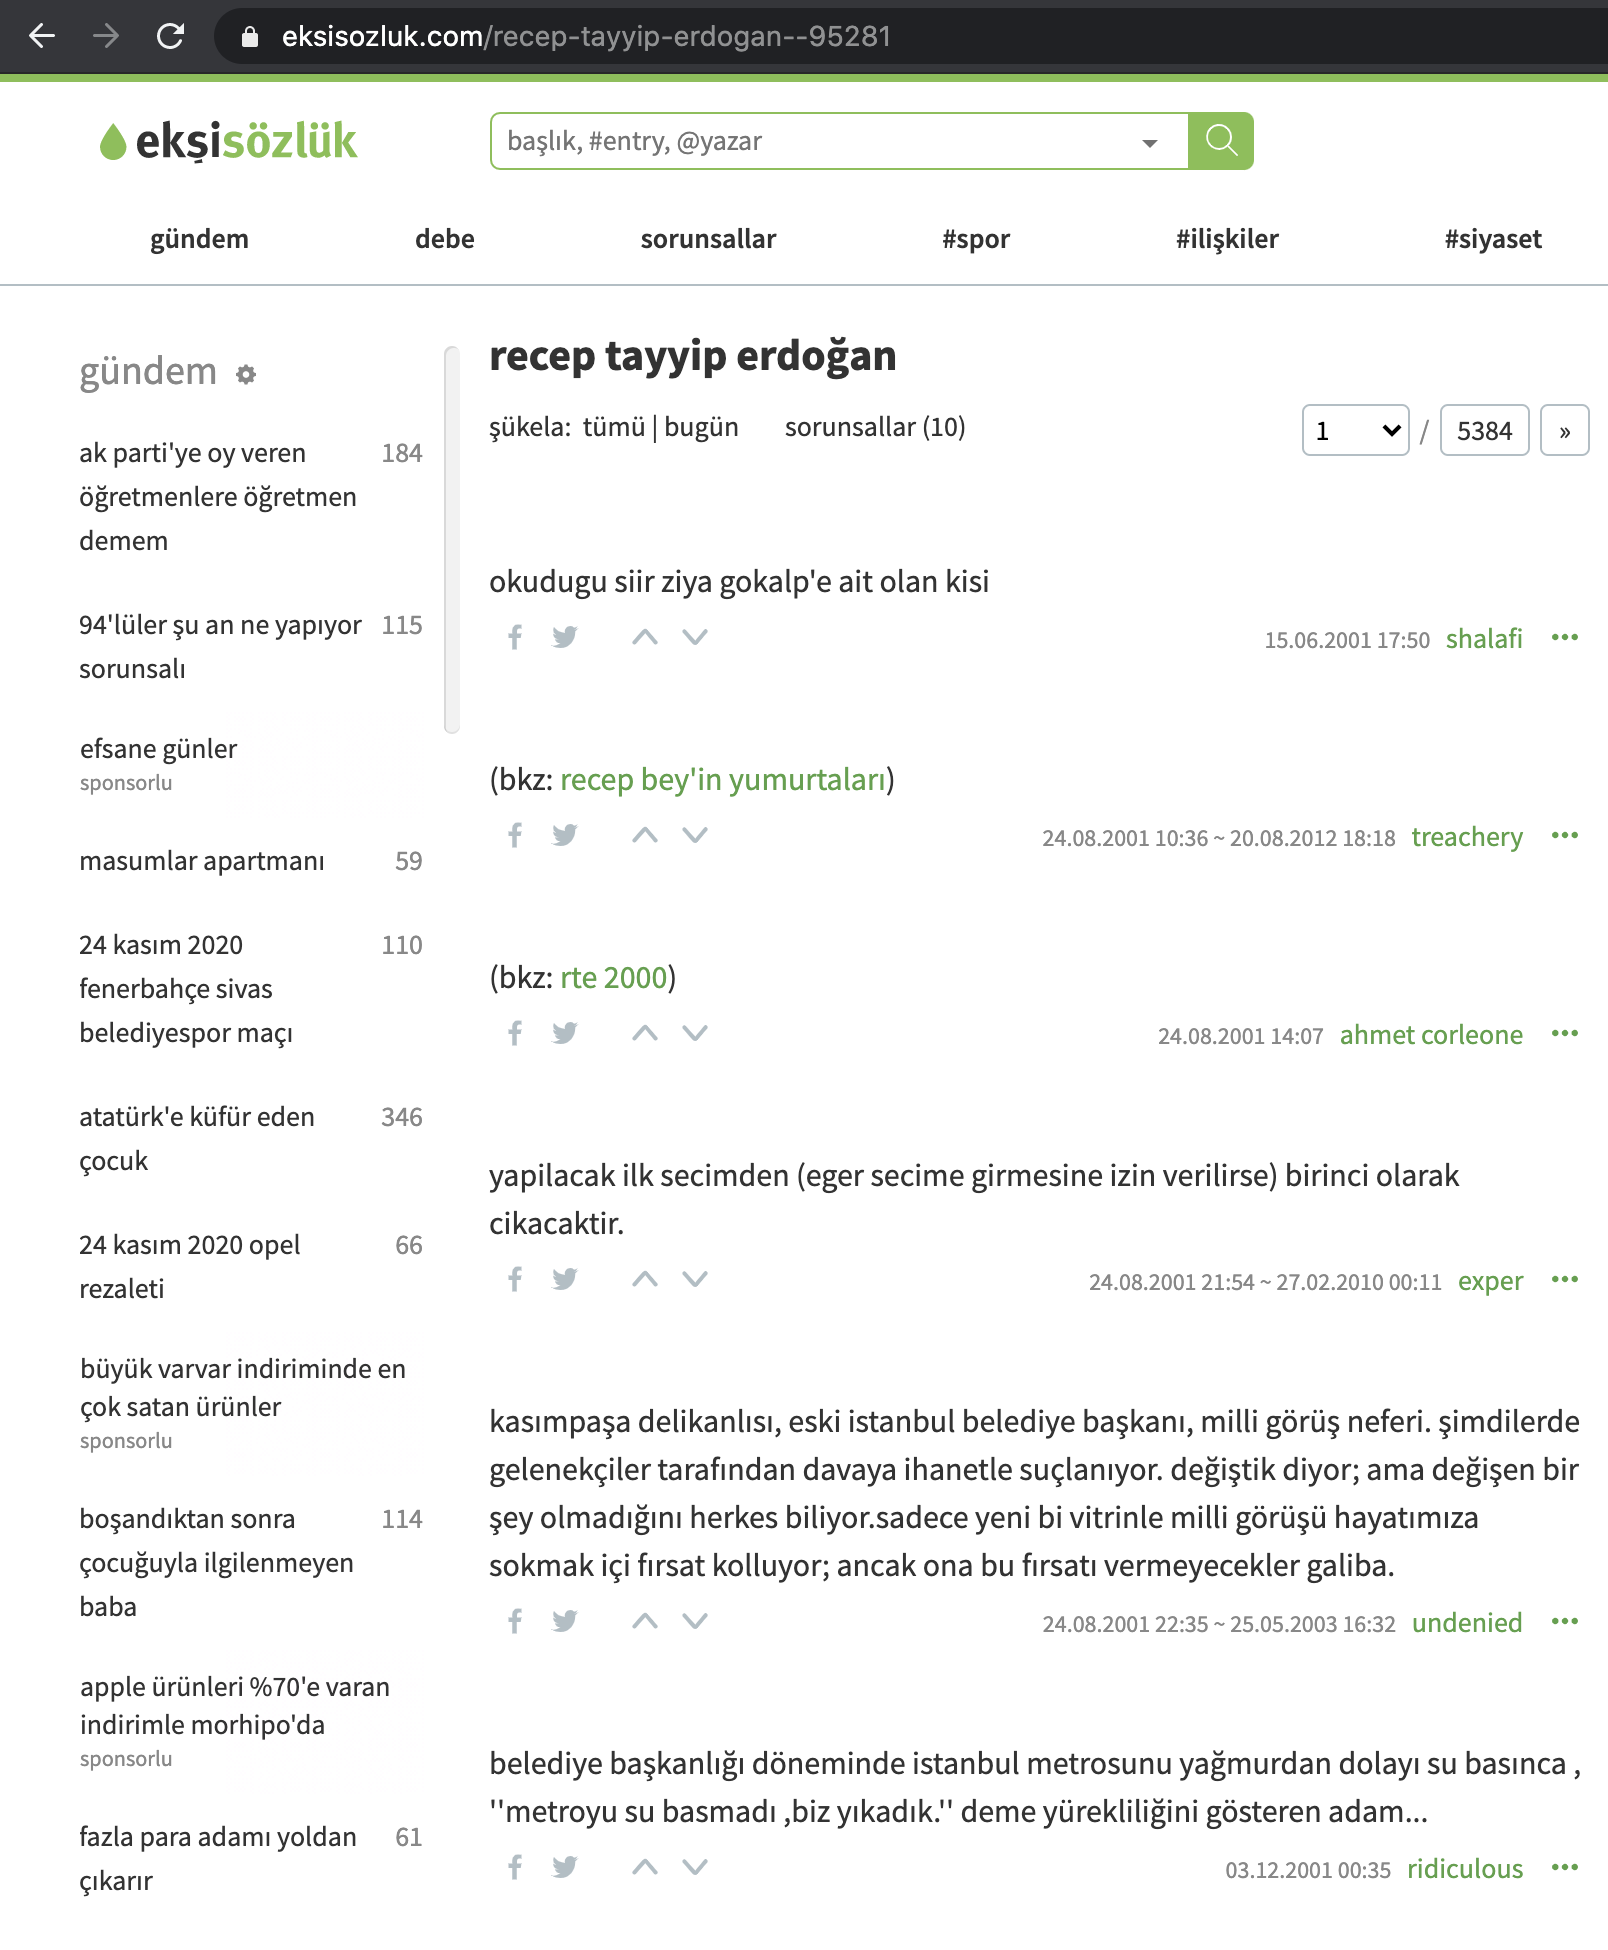

In [1]:
from IPython.display import Image
Image(filename='eksi.png')

## 2. Understanding the HTML Structure

Let's first understand the HTML structure of the website to be able to scrape it using bs4 library.

Luckily we have a quite straight forward structure here.

- Actual entry contents are stored in 'content' class of 'div' components.
- Entry dates are stored in 'entry-date permalink' class of 'a' components.
- Author names, or user names, are stored in 'entry-author' class of 'a' components.

Below you can see components of the first entry of the Erdogan thread embedded in HTML code, which you can confirm from the website image above.

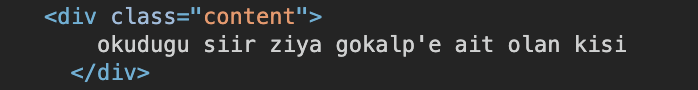

In [2]:
Image(filename='content.png')

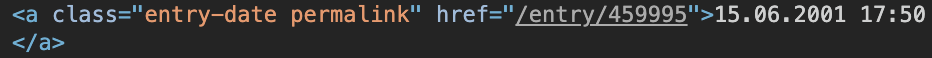

In [3]:
Image(filename='date.png')

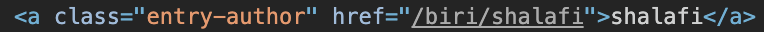

In [4]:
Image(filename='author.png')

## 3. Scraping the First Entry

Now that we know the HTML structure of the webpage, let's initialize the scraping process.

I will first import the necessary libraries.
Then I will try to extract the entry content, date and author information of the first entry of the thread.

When I am able to do this, I will move on and loop through all ~5300 pages of the thread (hence I retrieve the number 'last_page' as well).

In [5]:
from bs4 import BeautifulSoup
import urllib.request
import re
import pandas as pd

In [146]:
url = 'https://eksisozluk.com/recep-tayyip-erdogan--95281?p=1'
page = urllib.request.urlopen(url) # conntect to website
soup = BeautifulSoup(page, 'html.parser')

In [68]:
entries = soup.find_all('div', class_ = 'content')
date = soup.find_all('a', class_='entry-date permalink')
authors = soup.find_all('a', class_='entry-author')
last_page = soup.find_all('div', class_='pager')[0]['data-pagecount']

In [48]:
entries[0].text

"\r\n    okudugu siir ziya gokalp'e ait olan kisi\r\n  "

In [49]:
authors[0].text

'shalafi'

In [50]:
date[0].text

'15.06.2001 17:50'

In [73]:
last_page

'5381'

In [72]:
int(last_page)

5381

## 4. Looping Through All Pages

Now that we know how to scrape a page, let's loop through all pages and extract all the data we need.

Here I define two functions to get the job done:

**1. page_scraper():** a function which properly scrapes one page of eksisozluk given the url of that page

**2. eksi_scraper():** a function that feeds url adresses to the **page_scraper()** function and then stores the data in a pandas dataframe

In [6]:
def page_scraper(url):
    page = urllib.request.urlopen(url)
    soup = BeautifulSoup(page, 'html.parser')
    
    entries = soup.find_all('div', class_ = 'content')
    dates = soup.find_all('a', class_='entry-date permalink')
    authors = soup.find_all('a', class_='entry-author')
    
    entries = [d.text for d in entries]
    dates = [d.text for d in dates]
    authors = [d.text for d in authors]
    
    data = [entries, dates, authors]
    
    return data

In [7]:
def eksi_scraper(url_main):
    
    #initialize
    page = urllib.request.urlopen(url_main)
    soup = BeautifulSoup(page, 'html.parser')
    entry = []
    date = []
    author =[]
    
    #find number of pages
    last_page = soup.find_all('div', class_='pager')[0]['data-pagecount']
    last_page = int(last_page)
    
    #loop, scrape, append
    for p in range(last_page):
        page = p + 1
        url = url_main + "?p=" + str(page)
        data = page_scraper(url)
        print(p)
        
        for i in range(len(data[0])):
            entry.append(data[0][i])
            date.append(data[1][i])
            author.append(data[2][i])
            
    
    dict = {'entry': entry, 'date': date, 'author': author}  
    df = pd.DataFrame(dict)
    
    return df

------------------
Let's try to scrape 'Dominic Thiem' thread of 14 pages to test our functions.

-------

In [150]:
thiem = eksi_scraper('https://eksisozluk.com/dominic-thiem--3950778')
thiem

0
1
2
3
4
5
6
7
8
9
10
11
12
13


,entry,date,author
0,\r\n dunya 70 numarasi. kariyerinin en buyu...,07.05.2014 01:25,berci kristin
1,\r\n ilk murray'yle yaptığı maçta izlemişti...,07.05.2014 01:25,maybe on board
2,\r\n ilk 100 içindeki en genç oyuncudur.\r\n,07.05.2014 15:48,umudovskys
3,\r\n nice'de gilles simon' a 3 sette kaybed...,23.05.2014 14:30 ~ 27.05.2014 12:46,ankaragucume gidiyor boyle yasamak
4,\r\n (bkz: #42564797)beklenen karşılaşmayı ...,29.05.2014 11:43,maybe on board
...,...,...,...
133,\r\n atp sezon sonu finalleri ilk maçında o...,16.11.2020 00:02,mavyen
134,\r\n sayı alınca efendi gibi hareketler yap...,21.11.2020 20:06,seversen aldatirlar usta
135,\r\n 2020 sezon sonu turnuvasında önce grup...,21.11.2020 20:24 ~ 20:26,hoze antonyo babayaro
136,\r\n çok yetenekli tenisçidir. tek dezavant...,22.11.2020 00:44,omiros


-------
OK Great! They seem to work perfectly fine!

Let's scrape what we are actually interested in and save it to a variable named **rte**.

**note:** it takes around 20 mins to complete all ~5300 pages

------

In [ ]:
rte = eksi_scraper('https://eksisozluk.com/recep-tayyip-erdogan--95281')

In [267]:
rte.to_csv('rte.csv', index=False)

In [8]:
rte = pd.read_csv('rte.csv')

In [9]:
rte

,entry,date,author
0,\r\n okudugu siir ziya gokalp'e ait olan ki...,15.06.2001 17:50,shalafi
1,\r\n (bkz: recep bey'in yumurtaları)\r\n,24.08.2001 10:36 ~ 20.08.2012 18:18,treachery
2,\r\n (bkz: rte 2000)\r\n,24.08.2001 14:07,ahmet corleone
3,\r\n yapilacak ilk secimden (eger secime gi...,24.08.2001 21:54 ~ 27.02.2010 00:11,exper
4,"\r\n kasımpaşa delikanlısı, eski istanbul b...",24.08.2001 22:35 ~ 25.05.2003 16:32,undenied
...,...,...,...
53813,\r\n yapacağı (sözde) reformlar arasında if...,24.11.2020 11:06 ~ 11:10,coldman98
53814,\r\n 2023 ve 2027 seçimlerini rahatlıkla ka...,24.11.2020 12:42,interstellardaki robot tars
53815,\r\n aklı olan ingilizce öğrenip kendini bi...,24.11.2020 13:13,juvenescent day
53816,\r\n türkiye'yi özellikle savunma sanayiind...,24.11.2020 13:19,dalmakotuolur


-----
Here we have all 53817 entries of **Recep Tayyip Erdogan** thread, from 2001 till 2020!

-----

## 5. Data Cleaning

Altough we have collected the data succesfully, we need to clean strings in the entry column a little bit and we need to clean dates while converting them to the type date-time in our data frame.
  
  
**1. Cleaning Entry Column:**

All entry data have the same issue. Here is an example:

"\r\n    okudugu siir ziya gokalp'e ait olan kisi\r\n  "

Every entry begins and ends with the string '\r\n', and some white space characters.
Here we can first remove the string '\r\n' and then remove white spaces from the beginning and the end of the string.
  
  
**2. Cleaning Date Column:**

Here we see that some entries were edited by the user after it was written.

- The first date-time, before the ~ mark, indicates the original date the entry was written.
- The second date-time, after the ~ mark, indicates when it was last edited by the author.

We are not interested in the edit, the original date data is enough for us. Hence I will keep only the first part.

We are lucky so that every date-time string has the same format: '24.08.2001 22:35'  
That is, the first 16 characters of every string in the date column is in fact what we are looking for.  
Normally we could use a regex to take what's before the ~ mark, but in this case our task is quite straight forward.

In [10]:
rte_clean = pd.DataFrame(rte)
rte_clean['entry'] = rte_clean['entry'].str.replace('\r\n','').str.strip()

In [11]:
rte_clean['entry']

0                 okudugu siir ziya gokalp'e ait olan kisi
1                          (bkz: recep bey'in yumurtaları)
2                                          (bkz: rte 2000)
3        yapilacak ilk secimden (eger secime girmesine ...
4        kasımpaşa delikanlısı, eski istanbul belediye ...
                               ...                        
53813    yapacağı (sözde) reformlar arasında ifade özgü...
53814    2023 ve 2027 seçimlerini rahatlıkla kazanır eğ...
53815    aklı olan ingilizce öğrenip kendini bir alanda...
53816    türkiye'yi özellikle savunma sanayiinde ileri ...
53817    2023 2027 diyenler var.bu ekonomi ile mi olaca...
Name: entry, Length: 53818, dtype: object

In [12]:
rte_clean['date'] = [d[0:16] for d in rte['date']]

In [13]:
rte_clean['date']

0        15.06.2001 17:50
1        24.08.2001 10:36
2        24.08.2001 14:07
3        24.08.2001 21:54
4        24.08.2001 22:35
               ...       
53813    24.11.2020 11:06
53814    24.11.2020 12:42
53815    24.11.2020 13:13
53816    24.11.2020 13:19
53817    24.11.2020 13:24
Name: date, Length: 53818, dtype: object

In [14]:
rte_clean['date'] = pd.to_datetime(rte_clean['date'])

In [15]:
rte_clean['date']

0       2001-06-15 17:50:00
1       2001-08-24 10:36:00
2       2001-08-24 14:07:00
3       2001-08-24 21:54:00
4       2001-08-24 22:35:00
                ...        
53813   2020-11-24 11:06:00
53814   2020-11-24 12:42:00
53815   2020-11-24 13:13:00
53816   2020-11-24 13:19:00
53817   2020-11-24 13:24:00
Name: date, Length: 53818, dtype: datetime64[ns]

In [16]:
rte_clean

,entry,date,author
0,okudugu siir ziya gokalp'e ait olan kisi,2001-06-15 17:50:00,shalafi
1,(bkz: recep bey'in yumurtaları),2001-08-24 10:36:00,treachery
2,(bkz: rte 2000),2001-08-24 14:07:00,ahmet corleone
3,yapilacak ilk secimden (eger secime girmesine ...,2001-08-24 21:54:00,exper
4,"kasımpaşa delikanlısı, eski istanbul belediye ...",2001-08-24 22:35:00,undenied
...,...,...,...
53813,yapacağı (sözde) reformlar arasında ifade özgü...,2020-11-24 11:06:00,coldman98
53814,2023 ve 2027 seçimlerini rahatlıkla kazanır eğ...,2020-11-24 12:42:00,interstellardaki robot tars
53815,aklı olan ingilizce öğrenip kendini bir alanda...,2020-11-24 13:13:00,juvenescent day
53816,türkiye'yi özellikle savunma sanayiinde ileri ...,2020-11-24 13:19:00,dalmakotuolur


-----
Great! We have cleaned entry and date columns. We also converted dates to type date-time properly.  
We can now begin our analysis. Let's go find out what this data can tell us!

-----

## 6. Visualization and Exploration

This is not really a complex data set that we'd create many visualizations and perform great exploratory analysis on.

One simple visualization, however, can tell us a lot about Erdogan's political career:

In [17]:
rte_clean['year'] = rte_clean['date'].dt.isocalendar().year
rte_clean['week'] = rte_clean['date'].dt.isocalendar().week
rte_clean['day'] = rte_clean['date'].dt.dayofyear

# rte_clean['year-week'] = rte_clean['year']+ "-" + rte_clean['week']
rte_clean

,entry,date,author,year,week,day
0,okudugu siir ziya gokalp'e ait olan kisi,2001-06-15 17:50:00,shalafi,2001,24,166
1,(bkz: recep bey'in yumurtaları),2001-08-24 10:36:00,treachery,2001,34,236
2,(bkz: rte 2000),2001-08-24 14:07:00,ahmet corleone,2001,34,236
3,yapilacak ilk secimden (eger secime girmesine ...,2001-08-24 21:54:00,exper,2001,34,236
4,"kasımpaşa delikanlısı, eski istanbul belediye ...",2001-08-24 22:35:00,undenied,2001,34,236
...,...,...,...,...,...,...
53813,yapacağı (sözde) reformlar arasında ifade özgü...,2020-11-24 11:06:00,coldman98,2020,48,329
53814,2023 ve 2027 seçimlerini rahatlıkla kazanır eğ...,2020-11-24 12:42:00,interstellardaki robot tars,2020,48,329
53815,aklı olan ingilizce öğrenip kendini bir alanda...,2020-11-24 13:13:00,juvenescent day,2020,48,329
53816,türkiye'yi özellikle savunma sanayiinde ileri ...,2020-11-24 13:19:00,dalmakotuolur,2020,48,329


In [18]:
rte_weekly = rte_clean.groupby(pd.Grouper(key='date',freq='W')).count().reset_index()

In [19]:
%matplotlib inline 
import matplotlib
import numpy as np
import matplotlib.pyplot as plt

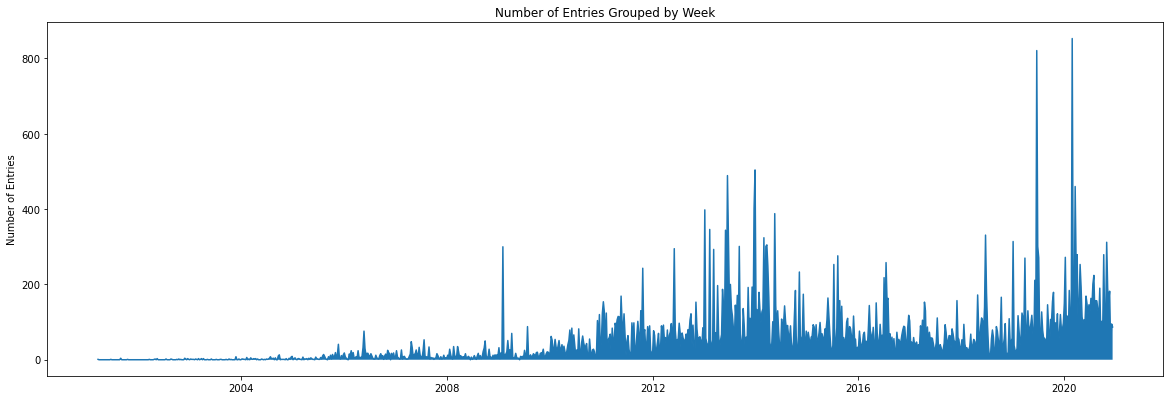

In [20]:
rte_weekly = rte_clean.groupby(pd.Grouper(key='date',freq='W')).count().reset_index()
x = rte_weekly['date']
y = rte_weekly['entry']

fig, ax = plt.subplots()

ax.plot(x, y)

ax.fill_between(x, y)

ax.set_title('Number of Entries Grouped by Week')
ax.set_ylabel('Number of Entries')
fig.set_size_inches(20, 6.5)

plt.show()

## 7. Tokenize Text

In [21]:
from trnlp import *
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from PIL import Image

In [22]:
obj = TrnlpWord()
obj.setword("geceler")
print(obj.get_base)

gece


In [23]:
def get_base(word_list):
    word_list_corrected = []
    
    for word in word_list:
        
        obj = TrnlpWord()
        obj.setword(word)
        word_corrected = obj.get_base
        word_list_corrected.append(word_corrected)
    
    return word_list_corrected

In [24]:
test_list = ['arkada', 'geceler', 'asfsafsafsa', 'uyutmuyorlar']
tested = get_base(test_list)
tested

['arka', 'gece', '', 'uyu']

In [25]:
test_text = " ".join(entry for entry in rte_clean.entry)

In [26]:
print ("There are {} words in the combination of all entries.".format(len(test_text)))

There are 20599991 words in the combination of all entries.


In [27]:
def word_clouder(df):
    custom_sw = ['o','ol','art','gel','bun','ziya','et','yap']
    
    text = " ".join(entry for entry in df.entry)
    text_tokenized = word_token(text)
    text_fixed = get_base(text_tokenized)
    text_final = [a for a in text_fixed if a not in custom_sw]  
    text_joined = " ".join(word for word in text_final)
    text_sw = word_token(text_joined, sw=stopwords)
    text_sw_join = " ".join(w for w in text_sw)
    wordcloud = WordCloud(background_color="white").generate(text_sw_join)
    
    return wordcloud

In [28]:
first100 = rte_clean[0:100]

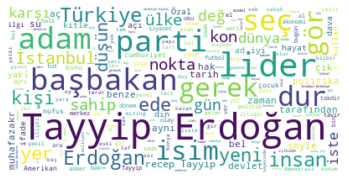

In [31]:
cloud100 = word_clouder(first100)
plt.imshow(cloud100, interpolation='bilinear')
plt.axis("off")
plt.show()

In [ ]:
ataturk = eksi_scraper('https://eksisozluk.com/mustafa-kemal-ataturk--34712')
ataturk.to_csv('ataturk.csv', index=False)

In [33]:
ataturk = pd.read_csv('ataturk.csv')
ataturk

,entry,date,author
0,\r\n bu cografya da dogmus olduguma sevinme...,22.06.1999,otisabi
1,"\r\n o olmasaydi biz, ""biz"" olur muyduk bil...",22.06.1999,elmyra
2,\r\n guzel insan keza bu kadarı yeter.\r\n,04.08.1999,factotum
3,\r\n (bkz: 10 kasim)\r\n,10.11.1999 20:52,kalliste
4,"\r\n sarı saçlı mavi gözlü yakışıklı, güzel...",11.12.1999 16:06,otisabi
...,...,...,...
20839,\r\n mustafa kemal’i anlamaya çalıştığımda ...,28.11.2020 19:33 ~ 29.11.2020 00:48,dovletbizebokmir
20840,"\r\n atatürk'ün öldüğünü öğrenen köy halkı,...",28.11.2020 22:20,cassy06
20841,"\r\n ""beni övme sözlerini bırakınız;gelecek...",28.11.2020 23:51,wolfx54
20842,"\r\n anayasa ile korunan ""tarihi"" kişilik.\...",29.11.2020 00:16,greby


In [34]:
ataturk['entry'] = ataturk['entry'].str.replace('\r\n','').str.strip()

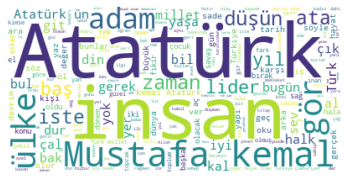

In [35]:
cloud_ataturk = word_clouder(ataturk)
plt.imshow(cloud_ataturk, interpolation='bilinear')
plt.axis("off")
plt.show()

In [297]:
url_ataturk = 'https://eksisozluk.com/mustafa-kemal-ataturk--34712'
url_inonu = 'https://eksisozluk.com/ismet-inonu--68599'
url_evren = 'https://eksisozluk.com/kenan-evren--35754'
url_ozal = 'https://eksisozluk.com/turgut-ozal--38992'
url_ecevit = 'https://eksisozluk.com/bulent-ecevit--54499'
url_menderes = 'https://eksisozluk.com/adnan-menderes--86896'
url_ciller = 'https://eksisozluk.com/tansu-ciller--51329'
url_demirel = 'https://eksisozluk.com/suleyman-demirel--56076'
url_sezer = 'https://eksisozluk.com/ahmet-necdet-sezer--70513'
url_gul = 'https://eksisozluk.com/abdullah-gul--72865'
url_erdogan = 'https://eksisozluk.com/recep-tayyip-erdogan--95281'

In [ ]:
inonu = eksi_scraper(url_inonu)
inonu.to_csv('inonu.csv', index=False)
print('inonu completed')

evren = eksi_scraper(url_evren)
evren.to_csv('evren.csv', index=False)
print('evren completed')

ozal = eksi_scraper(url_ozal)
ozal.to_csv('ozal.csv', index=False)
print('ozal completed')

ecevit = eksi_scraper(url_ecevit)
ecevit.to_csv('ecevit.csv', index=False)
print('ecevit completed')

menderes = eksi_scraper(url_menderes)
menderes.to_csv('menderes.csv', index=False)
print('menderes completed')

ciller = eksi_scraper(url_ciller)
ciller.to_csv('ciller.csv', index=False)
print('ciller completed')

demirel = eksi_scraper(url_demirel)
demirel.to_csv('demirel.csv', index=False)
print('demirel completed')

sezer = eksi_scraper(url_sezer)
sezer.to_csv('sezer.csv', index=False)
print('sezer completed')

gul = eksi_scraper(url_gul)
gul.to_csv('gul.csv', index=False)
print('gul completed')

In [36]:
inonu = pd.read_csv('inonu.csv')

evren = pd.read_csv('evren.csv')

ozal = pd.read_csv('ozal.csv')

ecevit = pd.read_csv('ecevit.csv')

menderes = pd.read_csv('menderes.csv')

ciller = pd.read_csv('ciller.csv')

demirel = pd.read_csv('demirel.csv')

sezer = pd.read_csv('sezer.csv')

gul = pd.read_csv('gul.csv')

In [43]:
cloud_ataturk = word_clouder(ataturk)
cloud_inonu = word_clouder(inonu)
cloud_evren = word_clouder(evren)
cloud_ozal = word_clouder(ozal)
cloud_ecevit = word_clouder(ecevit)
cloud_menderes = word_clouder(menderes)
cloud_ciller = word_clouder(ciller)
cloud_demirel = word_clouder(demirel)
cloud_sezer = word_clouder(sezer)
cloud_gul = word_clouder(gul)
cloud_rte = word_clouder(rte)

In [ ]:
plt.imshow(cloud_ataturk, interpolation='bilinear')
plt.axis("off")
plt.savefig('ataturk.png', bbox_inches='tight')
plt.show()

In [ ]:
plt.imshow(cloud_inonu, interpolation='bilinear')
plt.axis("off")
plt.savefig('inonu.png', bbox_inches='tight')
plt.show()

In [ ]:
plt.imshow(cloud_evren, interpolation='bilinear')
plt.axis("off")
plt.savefig('evren.png', bbox_inches='tight')
plt.show()

In [ ]:
plt.imshow(cloud_ozal, interpolation='bilinear')
plt.axis("off")
plt.savefig('ozal.png', bbox_inches='tight')
plt.show()

In [ ]:
plt.imshow(cloud_ecevit, interpolation='bilinear')
plt.axis("off")
plt.savefig('ecevit.png', bbox_inches='tight')
plt.show()

In [ ]:
plt.imshow(cloud_menderes, interpolation='bilinear')
plt.axis("off")
plt.savefig('menderes.png', bbox_inches='tight')
plt.show()

In [ ]:
plt.imshow(cloud_ciller, interpolation='bilinear')
plt.axis("off")
plt.savefig('ciller.png', bbox_inches='tight')
plt.show()

In [ ]:
plt.imshow(cloud_demirel, interpolation='bilinear')
plt.axis("off")
plt.savefig('demirel.png', bbox_inches='tight')
plt.show()

In [ ]:
plt.imshow(cloud_sezer, interpolation='bilinear')
plt.axis("off")
plt.savefig('sezer.png', bbox_inches='tight')
plt.show()

In [ ]:
plt.imshow(cloud_gul, interpolation='bilinear')
plt.axis("off")
plt.savefig('gul.png', bbox_inches='tight')
plt.show()

In [ ]:
plt.imshow(cloud_rte, interpolation='bilinear')
plt.axis("off")
plt.savefig('rte.png', bbox_inches='tight')
plt.show()